# Stimulation X Run ANOVA
#### Taku Ito
#### 11/6/15

Description:
Ran a whole-brain correlation map 3-way ANOVA with 2 fixed-effects (stimulation and runs) with 1 random-effects (subjects). lMT was the seed region.


In [27]:
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
# Import 4 timeseries for each subject (4 conditions)
subjects = ['038','069','083','141','144','170','172','173','177','178']


# Instantiate dict for cluster data
clustdata = {}
# Instantiate dict for seed data
seeddat = {}
basedir = '/projects/Collaborations/KrekelbergCollaboration/MotionAdaptation_tACS_FC/data/'
datadir = basedir + 'results/4WayANOVAMats_STIMxHEMIxTIMExSUBJ/STIMxTIMExSUBJANOVA_wholebrain/interactionEffect_sigClust_timeseries/'

correlations = {}
# Create averages matrix to plot; let rows be stimulation, columns be run
corravg = np.zeros(shape=(2,2))
# Compute SEM for plots
sem = {}
for i in range(1,5): sem[i] = []

# load timeseries data for seed (lMT) and cluster
for subj in subjects:
    subjdir = basedir + subj + '/fMRI/tacs_motionadaptationAnalysis/'
    
    # Load cluster timeseries
    clustdata[subj] = {}
    clustdata[subj][1] = np.loadtxt(datadir + subj + '_nostimXrun1_stimXtime_interactioneffect_clust.1D')
    clustdata[subj][2] = np.loadtxt(datadir + subj + '_nostimXrun2_stimXtime_interactioneffect_clust.1D')
    clustdata[subj][3] = np.loadtxt(datadir + subj + '_stimXrun1_stimXtime_interactioneffect_clust.1D')
    clustdata[subj][4] = np.loadtxt(datadir + subj + '_stimXrun2_stimXtime_interactioneffect_clust.1D')
    
    # Load seed (lMT) timeseries
    seeddat[subj] = {}
    tmpstimoff = np.loadtxt(subjdir + 'nostim_leftAreaMT_v2.1D')
    tmpstimon = np.loadtxt(subjdir + 'stim_leftAreaMT_v2.1D')
    seeddat[subj][1] = tmpstimoff[0:len(clustdata[subj][1])]
    seeddat[subj][2] = tmpstimoff[len(clustdata[subj][1]):]
    seeddat[subj][3] = tmpstimon[0:len(clustdata[subj][3])]
    seeddat[subj][4] = tmpstimon[len(clustdata[subj][3]):]
    
    # Compute correlations
    correlations[subj] = {}
    correlations[subj][1] = stats.pearsonr(seeddat[subj][1], clustdata[subj][1])[0]
    correlations[subj][2] = stats.pearsonr(seeddat[subj][2], clustdata[subj][2])[0]
    correlations[subj][3] = stats.pearsonr(seeddat[subj][3], clustdata[subj][3])[0]
    correlations[subj][4] = stats.pearsonr(seeddat[subj][4], clustdata[subj][4])[0]
    
    corravg[0,0] += correlations[subj][1] # no stim run 1
    corravg[0,1] += correlations[subj][2] # no stim run 2
    corravg[1,0] += correlations[subj][3] # stim run 1
    corravg[1,1] += correlations[subj][4] # stim run 4
    
    # Get array of correlations to compute SEM
    sem[1].append(correlations[subj][1])
    sem[2].append(correlations[subj][2])
    sem[3].append(correlations[subj][3])
    sem[4].append(correlations[subj][4])
    
# Compute average
corravg = corravg/len(subjects)
# compute SEM
ste = np.zeros(shape=(2,2))
ste[0,0] = np.std(sem[1])/np.sqrt(len(subjects))
ste[0,1] = np.std(sem[2])/np.sqrt(len(subjects))
ste[1,0] = np.std(sem[3])/np.sqrt(len(subjects))
ste[1,1] = np.std(sem[4])/np.sqrt(len(subjects))
    
    
    
    
    

([<matplotlib.axis.XTick at 0x7f57a599cdd0>,
 <a list of 4 Text xticklabel objects>)

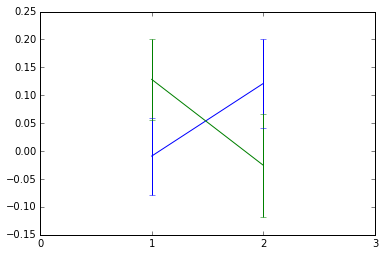

In [52]:
plt.errorbar([1,2],corravg[0,:],yerr=ste[0,:])
plt.errorbar([1,2],corravg[1,:],yerr=ste[1,:])
plt.xticks([0,1,2,3])


In [24]:
seeddat[subj][1].shape[0] + seeddat[subj][2].shape[0]
seeddat[subj][1].shape[0]

187

In [39]:
correlations

{'038': {1: -0.28607989094488606,
  2: -0.26427826665023668,
  3: -0.14423188736702489,
  4: -0.49963266789189908},
 '069': {1: 0.14286023898508893,
  2: 0.35665028620464778,
  3: 0.29684835413574046,
  4: 0.22406300093755718},
 '083': {1: 0.14702309798424351,
  2: 0.31183833756704493,
  3: 0.28864748603112134,
  4: 0.043872074224903627},
 '141': {1: -0.062655940059103202,
  2: 0.12920213864392541,
  3: 0.13933722734549031,
  4: 0.019256369123364387},
 '144': {1: -0.3771234948490666,
  2: -0.26933857859933513,
  3: -0.2474074973346628,
  4: -0.46224260995667704},
 '170': {1: -0.070994849784982716,
  2: 0.21741445100972864,
  3: 0.32640961995036905,
  4: 0.43611317560355234},
 '172': {1: 0.43954478258441637,
  2: 0.48026613652865174,
  3: 0.51397545972289593,
  4: 0.2314115403566222},
 '173': {1: 0.05465210800874562,
  2: 0.24703361901739418,
  3: 0.1442106436521825,
  4: 0.13648001704740731},
 '177': {1: -0.064773133639089389,
  2: -0.17156418793158601,
  3: 0.11598552776733788,
  4: -